# Lab | Handling Data Imbalance in Classification Models

### 1. Get ready

#### 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1 Import dataset

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

### 2. Data cleaning/understanding

#### 2.1 numerical

In [3]:
display(numerical.head(3))
numerical.shape

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

(95412, 315)

In [4]:
null_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
null_percent_num
null_percent_num.columns = ['column_name', 'nulls_percentage']
null_percent_num
#There are no null values
#nulls_percent_num[nulls_percent_num['nulls_percentage']!=0]

,column_name,nulls_percentage
0,TCODE,0.0
1,AGE,0.0
2,INCOME,0.0
3,WEALTH1,0.0
4,HIT,0.0
...,...,...
310,AVGGIFT,0.0
311,CONTROLN,0.0
312,HPHONE_D,0.0
313,RFA_2F,0.0


In [5]:
numerical.describe()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,954

In [6]:
# There are some values that need to be turned into objects
# Income, WEALTH1, WEALTH2, HPHONE_D, RFA_2F

In [7]:
print(numerical['INCOME'].value_counts(dropna=False))

5    36737
2    13114
4    12732
1     9022
3     8558
6     7778
7     7471
Name: INCOME, dtype: int64


In [8]:
# turn income to object
numerical['INCOME'] = numerical['INCOME'].astype('object')

In [9]:
print(numerical['WEALTH1'].value_counts(dropna=False))

9    52317
8     6793
7     6198
6     5825
5     5280
4     4810
3     4237
2     4085
1     3454
0     2413
Name: WEALTH1, dtype: int64


In [10]:
# turn wealth to object
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')

In [11]:
print(numerical['WEALTH2'].value_counts(dropna=False))

9    50346
8     5975
7     5684
6     5497
5     5351
4     5074
3     5046
2     4971
1     4191
0     3277
Name: WEALTH2, dtype: int64


In [12]:
# turn wealth to object
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')

In [13]:
print(numerical['HPHONE_D'].value_counts(dropna=False))

1    47765
0    47647
Name: HPHONE_D, dtype: int64


In [14]:
# turn HPHONE_D to object
numerical['HPHONE_D'] = numerical['HPHONE_D'].astype('object')

In [15]:
print(numerical['RFA_2F'].value_counts(dropna=False))

1    47675
2    20545
3    15291
4    11901
Name: RFA_2F, dtype: int64


In [16]:
# turn HPHONE_D to object
numerical['RFA_2F'] = numerical['RFA_2F'].astype('object')

In [17]:
numerical.dtypes

TCODE         int64
AGE         float64
INCOME       object
WEALTH1      object
HIT           int64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D     object
RFA_2F       object
CLUSTER2      int64
Length: 315, dtype: object

#### 2.2 categorical

In [18]:
display(categorical.head(3))
categorical.shape

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11.0
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10.0
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1.0


(95412, 22)

In [19]:
# Check for null values
categorical.isna().sum()/len(categorical)

STATE           0.000000
CLUSTER         0.000000
HOMEOWNR        0.000000
GENDER          0.000000
DATASRCE        0.000000
RFA_2R          0.000000
RFA_2A          0.000000
GEOCODE2        0.000000
DOMAIN_A        0.000000
DOMAIN_B        0.000000
ODATEW_YR       0.000000
ODATEW_MM       0.000000
DOB_YR          0.000000
DOB_MM          0.000000
MINRDATE_YR     0.000000
MINRDATE_MM     0.000000
MAXRDATE_YR     0.000000
MAXRDATE_MM     0.000000
LASTDATE_YR     0.000000
LASTDATE_MM     0.000000
FIRSTDATE_YR    0.000000
FIRSTDATE_MM    0.000021
dtype: float64

In [20]:
# Do I really need this?
pd.DataFrame(categorical['RFA_2R'].value_counts()).reset_index()

,index,RFA_2R
0,L,95412


In [21]:
pd.DataFrame(categorical['RFA_2A'].value_counts()).reset_index()

,index,RFA_2A
0,F,46964
1,E,21639
2,G,19397
3,D,7412


In [22]:
pd.DataFrame(categorical['FIRSTDATE_MM'].value_counts(dropna = False)).reset_index()

,index,FIRSTDATE_MM
0,1.0,18175
1,9.0,15196
2,10.0,14540
3,2.0,12839
4,3.0,6813
5,11.0,6572
6,12.0,5981
7,4.0,4267
8,6.0,3356
9,8.0,3008


In [23]:
categorical['FIRSTDATE_MM'] = categorical['FIRSTDATE_MM'].fillna(1.0)

In [24]:
pd.DataFrame(categorical['FIRSTDATE_MM'].value_counts(dropna = False)).reset_index()

,index,FIRSTDATE_MM
0,1.0,18177
1,9.0,15196
2,10.0,14540
3,2.0,12839
4,3.0,6813
5,11.0,6572
6,12.0,5981
7,4.0,4267
8,6.0,3356
9,8.0,3008


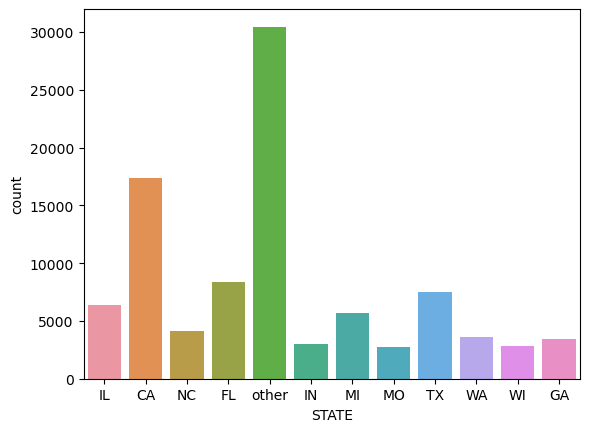

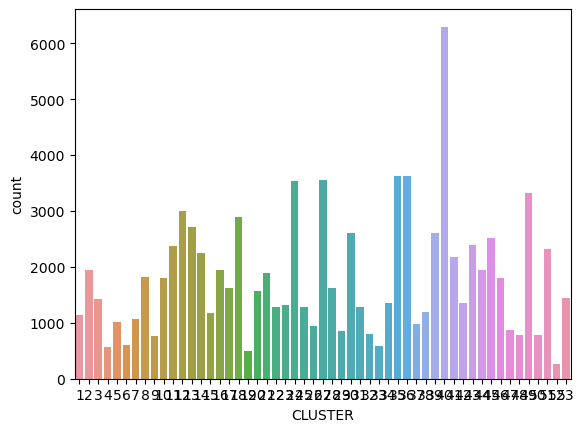

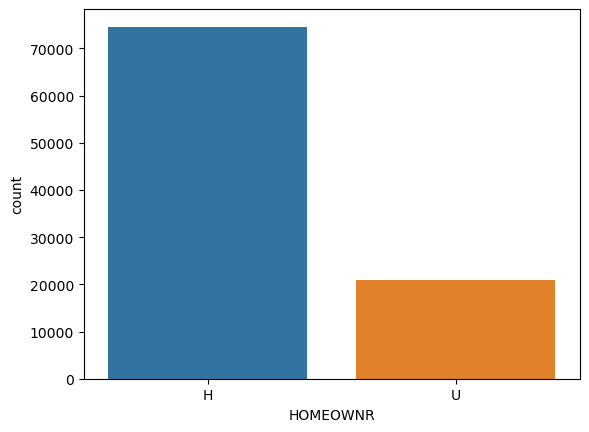

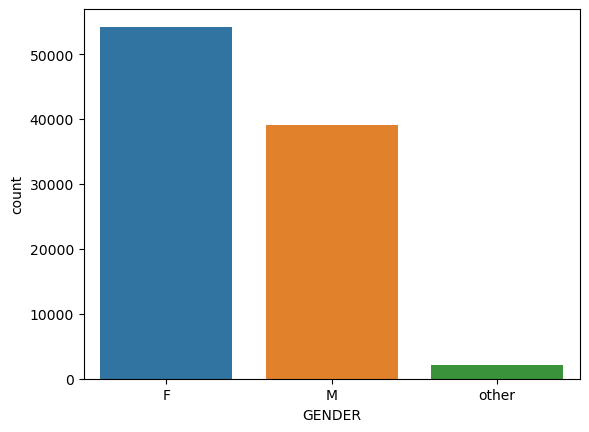

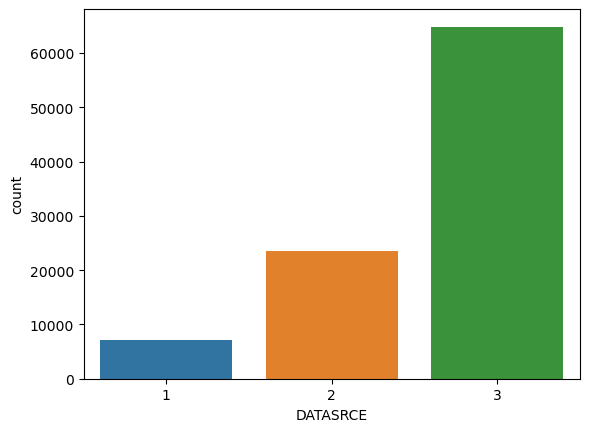

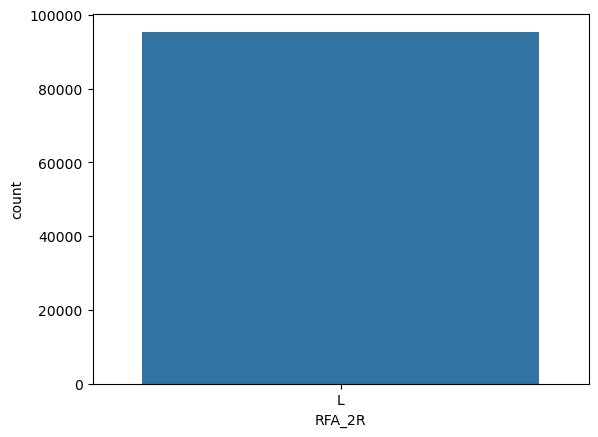

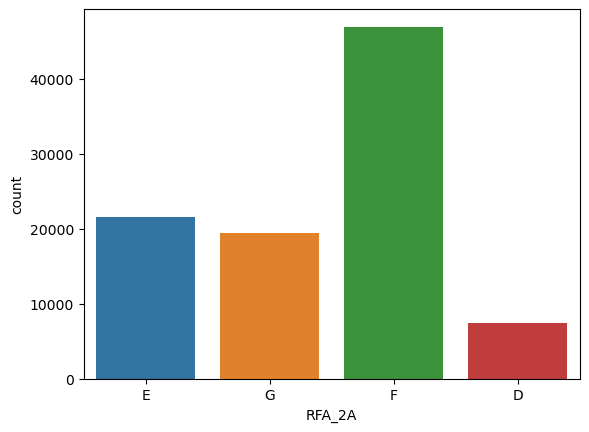

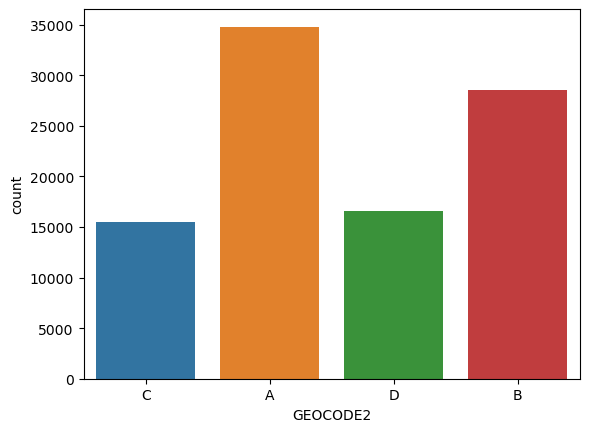

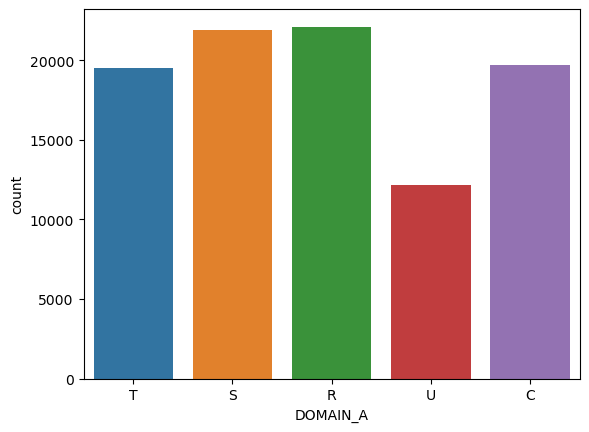

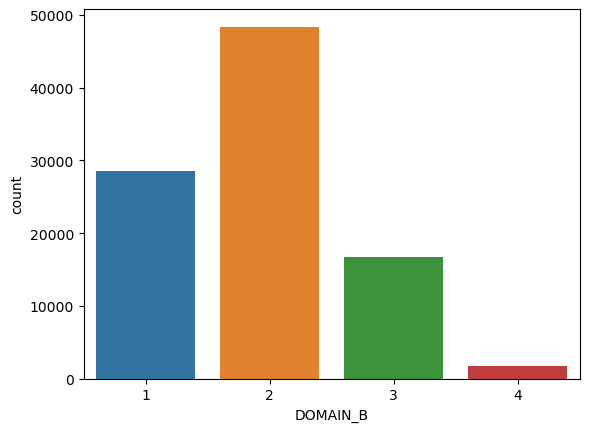

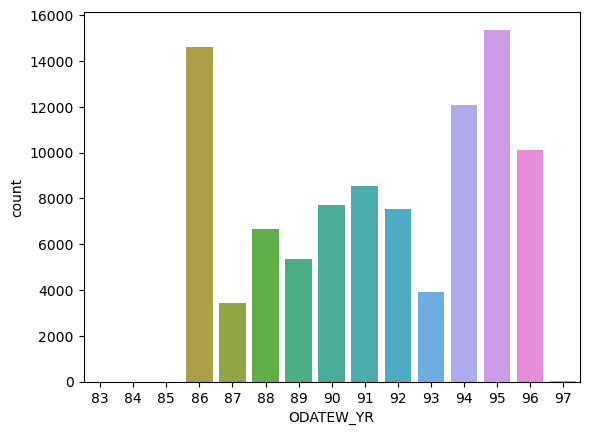

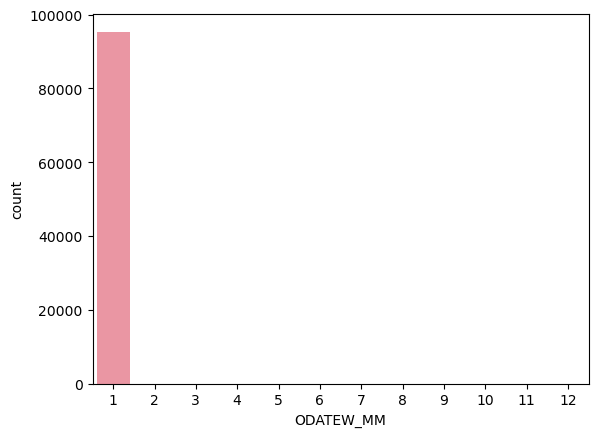

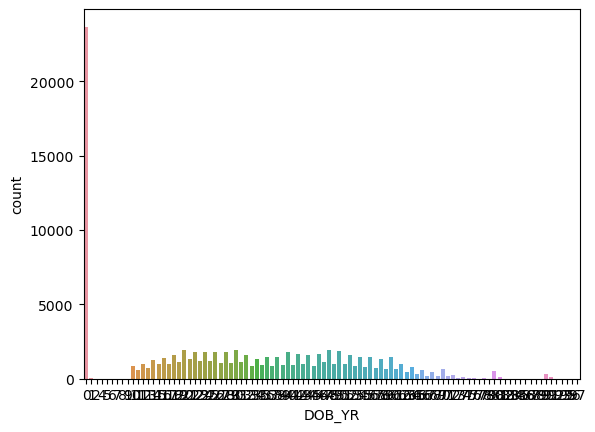

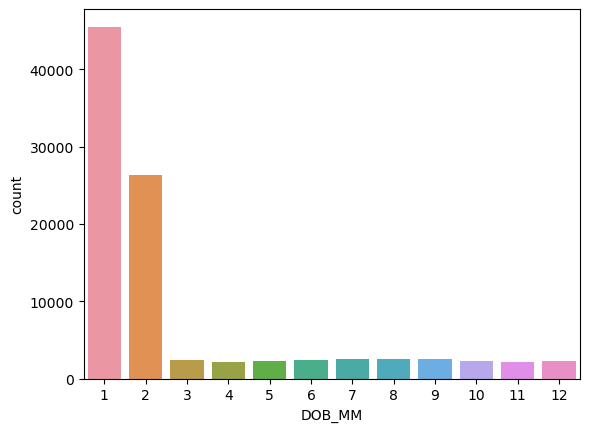

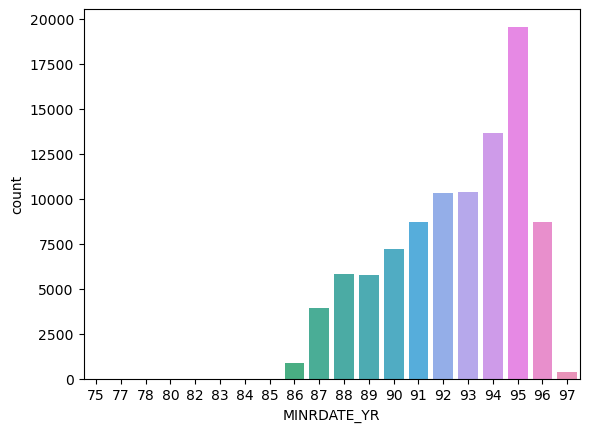

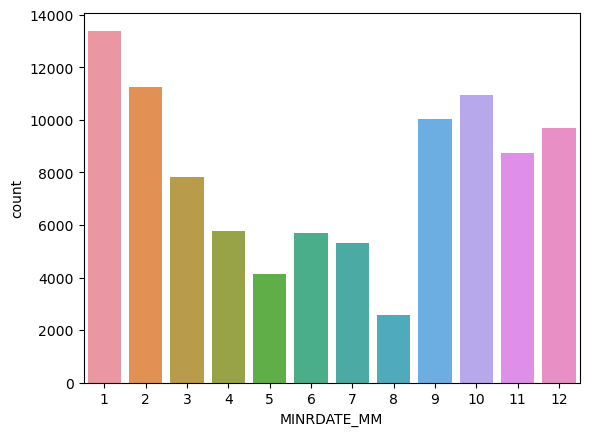

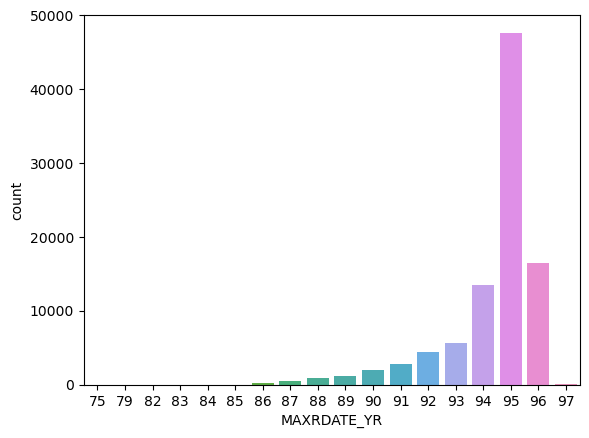

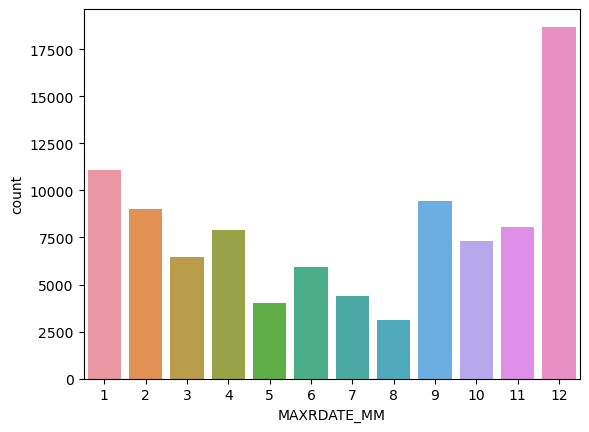

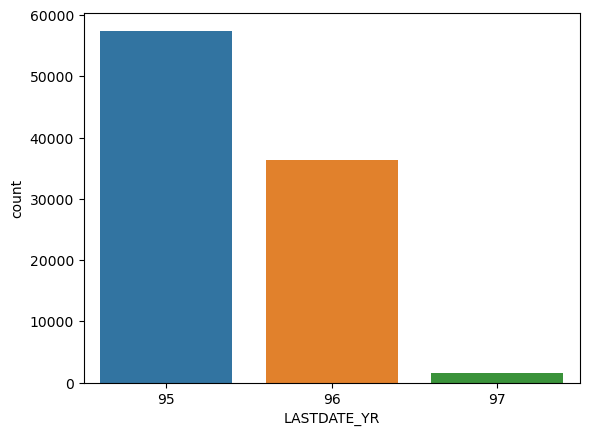

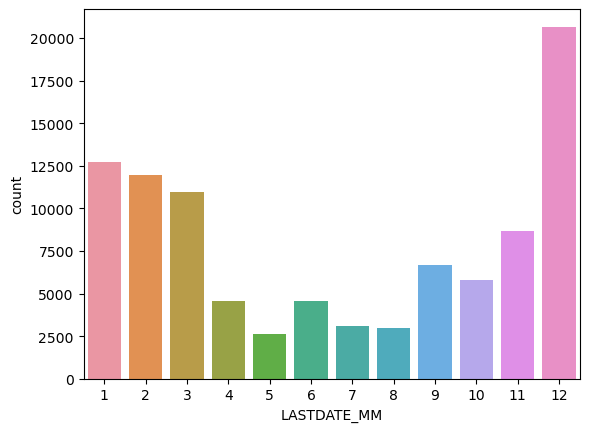

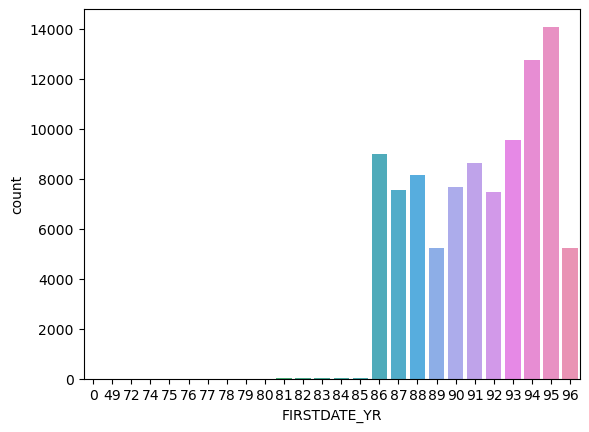

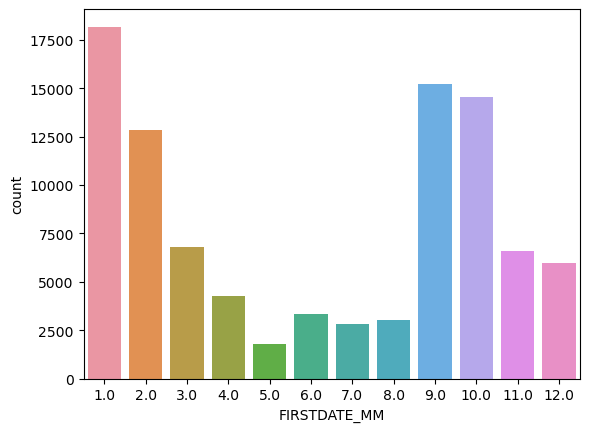

In [25]:
for col in categorical:
    sns.countplot(x=categorical[col])
    plt.show()

In [29]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,8,2,12
1,CA,14,H,M,3,L,G,A,S,1,10,12,12
2,NC,43,U,M,3,L,E,C,R,2,11,7,12
3,CA,44,U,F,3,L,E,C,R,2,11,11,12
4,FL,16,H,F,3,L,F,A,S,2,10,1,1


In [26]:
# DELETE the following columns

# ODATEW_MM
# DOB_YR / MM 
# MINRDATE_YR Date associated with the smallest gift to date
# MAXRDATE YR Date associated with the largest gift to date
# LASTDATE_YR
# FIRSTDATE_YR/ MM

In [27]:
categorical = categorical.drop(['ODATEW_YR', 'ODATEW_MM','DOB_YR','DOB_MM', 'MINRDATE_YR', 'MAXRDATE_YR','LASTDATE_YR', 'FIRSTDATE_YR', 'FIRSTDATE_MM'], axis = 1)

##### Check if dtypes are correctly distributed

In [28]:
categorical.dtypes

STATE          object
CLUSTER         int64
HOMEOWNR       object
GENDER         object
DATASRCE        int64
RFA_2R         object
RFA_2A         object
GEOCODE2       object
DOMAIN_A       object
DOMAIN_B        int64
MINRDATE_MM     int64
MAXRDATE_MM     int64
LASTDATE_MM     int64
dtype: object

In [30]:
# Change DOMAIN_B to object
display(pd.DataFrame(categorical['DOMAIN_B'].value_counts()).reset_index())
categorical['DOMAIN_B'] = categorical['DOMAIN_B'].astype('object')

,index,DOMAIN_B
0,2,48356
1,1,28498
2,3,16754
3,4,1804


In [31]:
# Change DATASCRE to object
display(pd.DataFrame(categorical['DATASRCE'].value_counts()).reset_index())
categorical['DATASCRE'] = categorical['DATASRCE'].astype('object')

,index,DATASRCE
0,3,64829
1,2,23455
2,1,7128


In [34]:
# Change MINRDATE_MM to object
display(pd.DataFrame(categorical['MINRDATE_MM'].value_counts()).reset_index())
categorical['MINRDATE_MM'] = categorical['MINRDATE_MM'].astype('object')

,index,MINRDATE_MM
0,1,13394
1,2,11241
2,10,10950
3,9,10035
4,12,9678
5,11,8743
6,3,7837
7,4,5777
8,6,5691
9,7,5330


In [35]:
# Change MAXRDATE_MM to object
display(pd.DataFrame(categorical['MAXRDATE_MM'].value_counts()).reset_index())
categorical['MAXRDATE_MM'] = categorical['MAXRDATE_MM'].astype('object')

,index,MAXRDATE_MM
0,12,18692
1,1,11083
2,9,9433
3,2,9017
4,11,8036
5,4,7895
6,10,7304
7,3,6489
8,6,5940
9,7,4387


In [36]:
# Change LASTDATE_MM  to object
display(pd.DataFrame(categorical['LASTDATE_MM'].value_counts()).reset_index())
categorical['LASTDATE_MM'] = categorical['LASTDATE_MM'].astype('object')

,index,LASTDATE_MM
0,12,20663
1,1,12734
2,2,11943
3,3,10989
4,11,8670
5,9,6705
6,10,5815
7,6,4589
8,4,4576
9,7,3095


#### 2.3. targets

In [37]:
targets['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [38]:
targets['TARGET_D'].value_counts(dropna = False)

0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: TARGET_D, Length: 71, dtype: int64

### 3. Feature Selection

Concatenate the **numerical and categorical variables** into features

#### 3.1. X/y split

In [46]:
Y = targets
y_B = targets['TARGET_B']
y_D = targets['TARGET_D']

In [40]:
X = pd.concat((numerical, categorical), axis = 1)
X.head(3)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,DATASCRE
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,8,2,12,3
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,10,12,12,3
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340

In [41]:
X_num = X.select_dtypes(np.number)
X_num.shape

(95412, 312)

In [42]:
X_cat = X.select_dtypes(object)
X_cat.shape

(95412, 17)

#### 3.2 Feature Selection for Numericals

##### 3.2.1 Scale Numericals

In [44]:
# we will use MinMaxScaler for this
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(X_num)


##### 3.2.2 SelectKBest

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=30).fit_transform(numerical_scaled, y_B) #fit_transform = take the 10 columns
# kbest acts as a transformer. fit means train. transform steps eliminates all the other ones
kbest
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.010101,0.079833,0.105833,0.230769,0.153846,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.010101,0.040404,0.020202,0.515152,0.010101,0.747475,0.313131,0.433333,0.366492,0.127119,0.341463,0.498045,0.622951
1,0.000000,0.911333,0.869667,0.923077,0.769231,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.333333,0.020202,0.323232,0.666667,0.030303,0.393939,0.979798,0.183333,0.146597,0.008475,0.024390,0.774510,0.000000
2,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.010101,0.202020,0.010101,0.313131,0.111111,0.848485,0.505051,0.416667,0.308901,0.110169,0.341463,0.078617,0.967213
3,0.000000,0.166667,0.210500,0.153846,0.076923,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.040404,0.353535,0.050505,0.262626,0.202020,0.676768,0.393939,0.433333,0.324607,0.063559,0.170732,0.899764,0.655738
4,0.989899,0.096000,0.099000,0.307692,0.230769,0.381818,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.020202,0.212121,0.030303,0.111111,0.141414,0.656566,0.060606,0.700000,0.570681,0.152542,0.195122,0.037079,0.409836


In [79]:
kbest = SelectKBest(chi2, k=30).fit(numerical_scaled, y_B)
df = pd.DataFrame(data = kbest.scores_, columns = ['score'])
df['Column'] = X_num.columns
df
print(df.sort_values(by = ['score'], ascending = False).head(30))

cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']
selected.columns = cols
selected.head()

         score    Column
302  27.516508  CARDGIFT
107  26.474583      HVP1
108  25.757492      HVP2
109  21.545080      HVP3
112  19.261394      HVP6
110  14.874056      HVP4
19   13.034181      ETH2
126  12.581538       RP1
127  11.022637       RP2
301   8.909015  NGIFTALL
80    8.309269       HV1
81    8.260178       HV2
105   7.470098     ETHC5
104   7.224822     ETHC4
296   7.083556  CARDPROM
297   6.744744   NUMPROM
128   5.622626       RP3
111   5.545304      HVP5
309   4.838850  CLUSTER2
83    3.847846       HV4
82    3.772977       HV3
147   2.894568      IC15
130   2.873016       MSA
155   2.838548      IC23
308   2.751733  CONTROLN
159   2.713679     HHAS4
158   2.675815     HHAS3
276   2.508204       HC6
263   2.472344     POBC2
146   2.434518      IC14


Column,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,RP2,NGIFTALL,HV1,HV2,ETHC5,ETHC4,CARDPROM,NUMPROM,RP3,HVP5,CLUSTER2,HV4,HV3,IC15,MSA,IC23,CONTROLN,HHAS4,HHAS3,HC6,POBC2,IC14
0,0.010101,0.079833,0.105833,0.230769,0.153846,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.010101,0.040404,0.020202,0.515152,0.010101,0.747475,0.313131,0.433333,0.366492,0.127119,0.341463,0.498045,0.622951
1,0.000000,0.911333,0.869667,0.923077,0.769231,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.333333,0.020202,0.323232,0.666667,0.030303,0.393939,0.979798,0.183333,0.146597,0.008475,0.024390,0.774510,0.000000
2,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.010101,0.202020,0.010101,0.313131,0.111111,0.848485,0.505051,0.416667,0.308901,0.110169,0.341463,0.078617,0.967213
3,0.000000,0.166667,0.210500,0.153846,0.076923,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.040404,0.353535,0.050505,0.262626,0.202020,0.676768,0.393939,0.433333,0.324607,0.063559,0.170732,0.899764,0.655738
4,0.989899,0.096000,0.099000,0.307692,0.230769,0.381818,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.020202,0.212121,0.030303,0.111111,0.141414,0.656566,0.060606,0.700000,0.570681,0.152542,0.195122,0.037079,0.409836


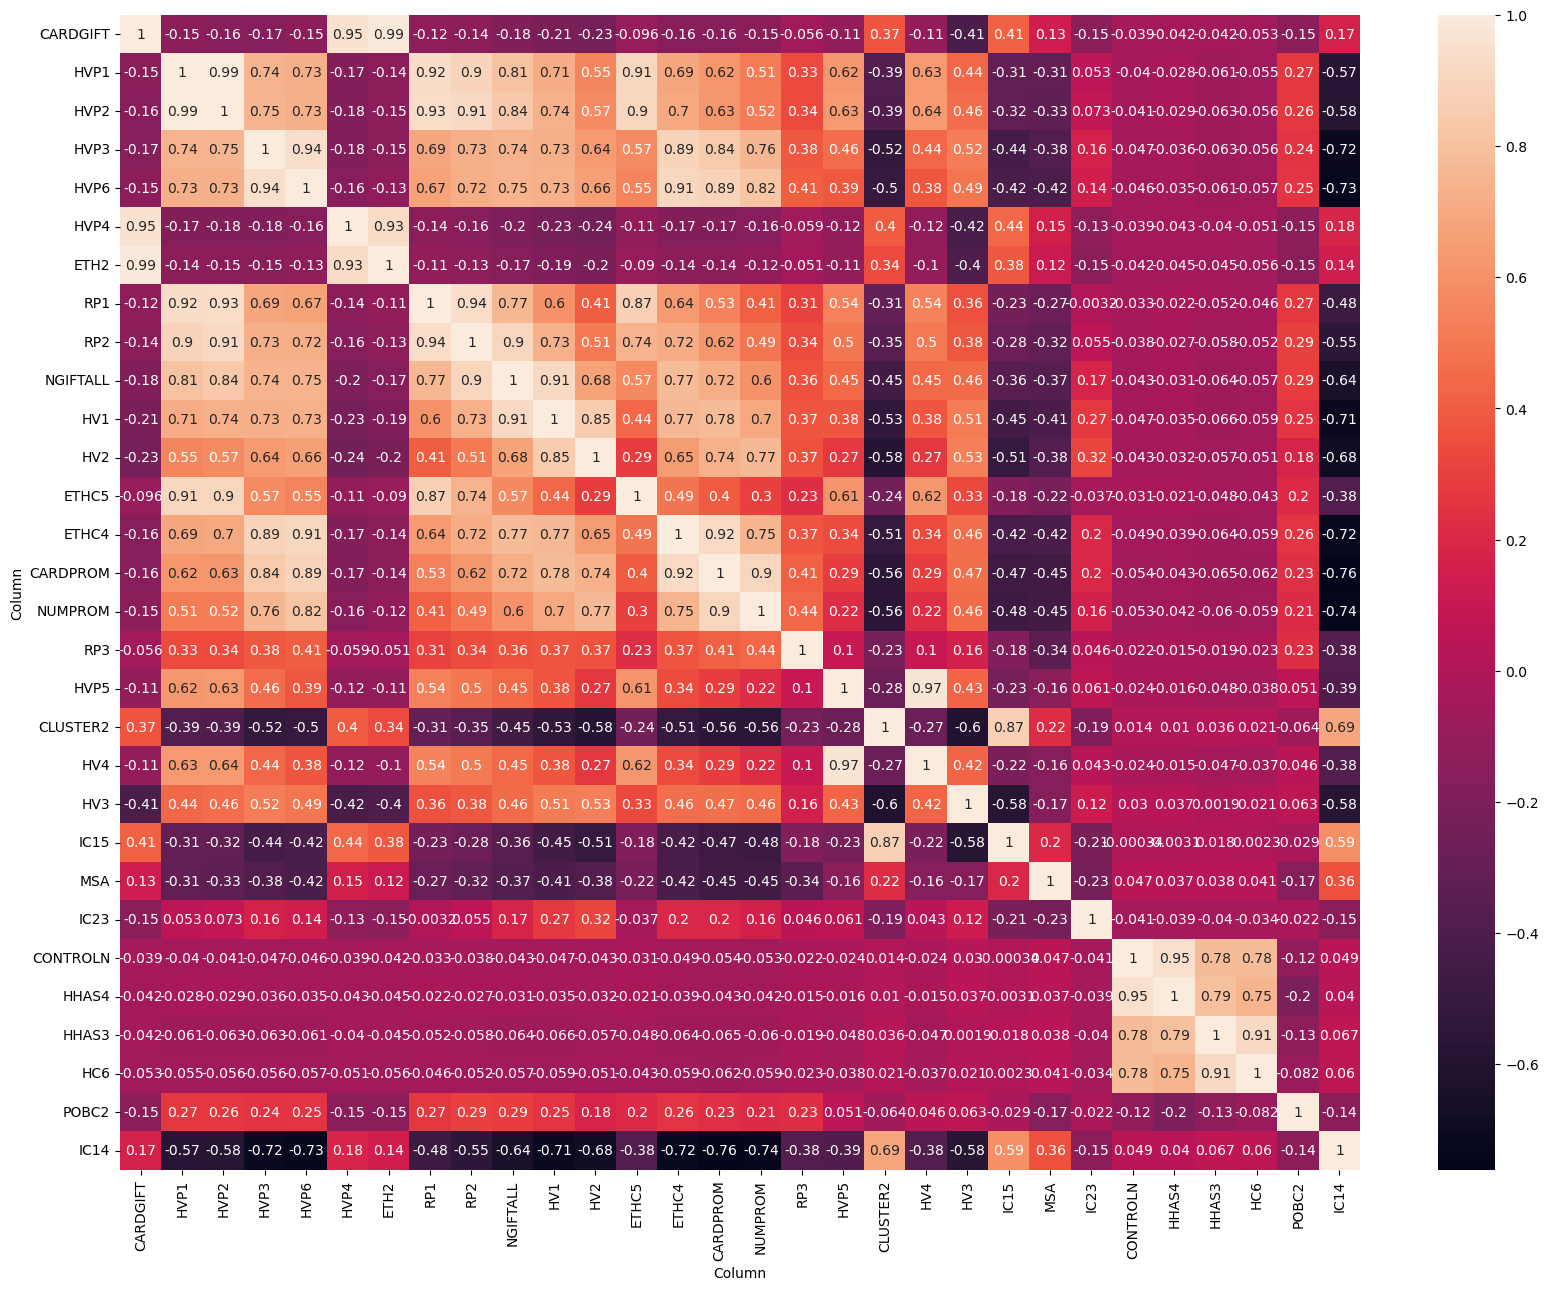

In [80]:
corr_matrix = selected.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)

In [81]:
selected.head()

Column,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,RP2,NGIFTALL,HV1,HV2,ETHC5,ETHC4,CARDPROM,NUMPROM,RP3,HVP5,CLUSTER2,HV4,HV3,IC15,MSA,IC23,CONTROLN,HHAS4,HHAS3,HC6,POBC2,IC14
0,0.010101,0.079833,0.105833,0.230769,0.153846,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.010101,0.040404,0.020202,0.515152,0.010101,0.747475,0.313131,0.433333,0.366492,0.127119,0.341463,0.498045,0.622951
1,0.000000,0.911333,0.869667,0.923077,0.769231,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.333333,0.020202,0.323232,0.666667,0.030303,0.393939,0.979798,0.183333,0.146597,0.008475,0.024390,0.774510,0.000000
2,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.010101,0.202020,0.010101,0.313131,0.111111,0.848485,0.505051,0.416667,0.308901,0.110169,0.341463,0.078617,0.967213
3,0.000000,0.166667,0.210500,0.153846,0.076923,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.040404,0.353535,0.050505,0.262626,0.202020,0.676768,0.393939,0.433333,0.324607,0.063559,0.170732,0.899764,0.655738
4,0.989899,0.096000,0.099000,0.307692,0.230769,0.381818,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.020202,0.212121,0.030303,0.111111,0.141414,0.656566,0.060606,0.700000,0.570681,0.152542,0.195122,0.037079,0.409836


In [ ]:
# Get rid of some values
- CONTROLN
- HVP1-HVP6
- ETHC
- ETH2
- RP1-4
- HV2 and HV4
- CARDPROM
- IC15, IC23, IC14
- HHAS3, HHAS4

In [92]:
#drop_columns = selected
X_num_clean = X_num[['CARDGIFT', 'NGIFTALL','HV2','NUMPROM','CLUSTER2','HV4','MSA','HC6','POBC2']]
num_clean_selected = selected.drop(['CONTROLN', 'HVP1', 'HVP2', 'HVP3', 'HVP4', 'HVP6', 'ETHC4', 'HVP5','ETHC5', 'ETH2', 'RP1','RP2', 'RP3', 'HV1', 'HV3', 'CARDPROM', 'IC15', 'IC23', 'IC14', 'HHAS3', 'HHAS4'], axis = 1)

In [93]:
X_num_clean.head()

,CARDGIFT,NGIFTALL,HV2,NUMPROM,CLUSTER2,HV4,MSA,HC6,POBC2
0,14,31,635,74,39,2,0.0,31,74
1,1,3,5218,32,1,10,4480.0,97,39
2,14,27,546,63,60,1,0.0,50,84
3,7,16,1263,66,41,1,9340.0,39,67
4,8,37,594,113,26,3,5000.0,6,65


#### 3.3 Feature Selection for Categoricals

In [86]:
X_cat

,INCOME,WEALTH1,WEALTH2,HPHONE_D,RFA_2F,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,DATASCRE
0,5,9,5,0,4,IL,H,F,L,E,C,T,2,8,2,12,3
1,6,9,9,0,2,CA,H,M,L,G,A,S,1,10,12,12,3
2,3,1,1,1,4,NC,U,M,L,E,C,R,2,11,7,12,3
3,1,4,0,1,4,CA,U,F,L,E,C,R,2,11,11,12,3
4,3,2,9,1,2,FL,H,F,L,F,A,S,2,10,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,5,9,9,0,1,other,H,M,L,G,C,C,2,2,2,2,3
95408,7,9,9,1,1,TX,H,M,L,F,A,C,1,3,3,3,3
95409,5,9,9,1,3,MI,H,M,L,E,B,C,3,3,1,10,3
95410,7,9,7,1,4,CA,H,F,L,F,A,C,1,11,8,1,2


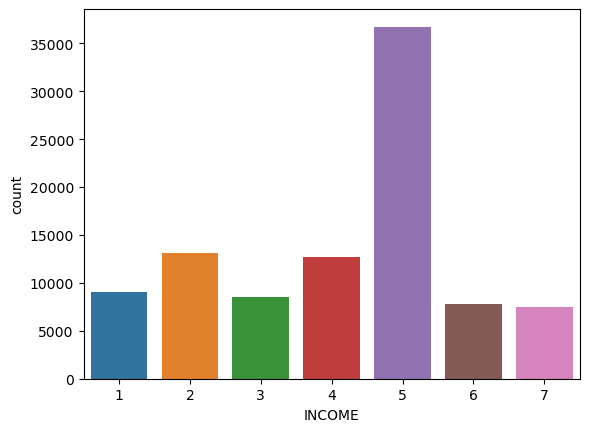

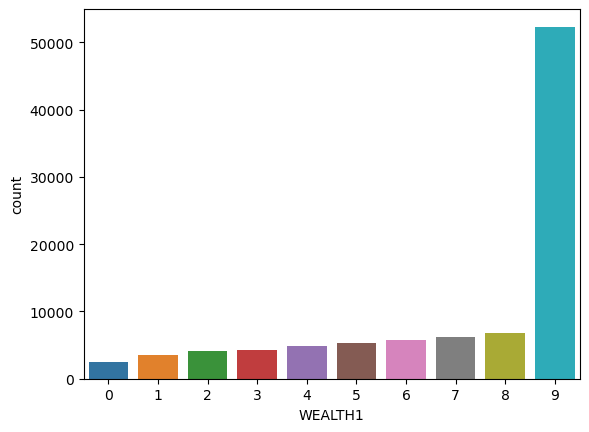

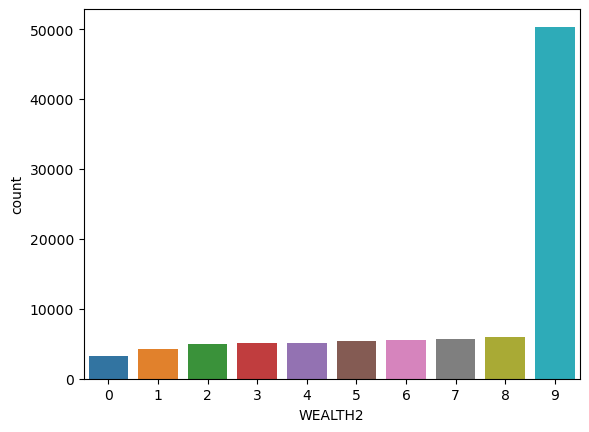

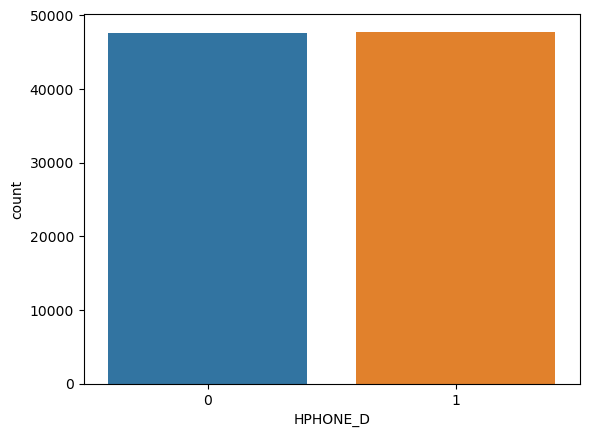

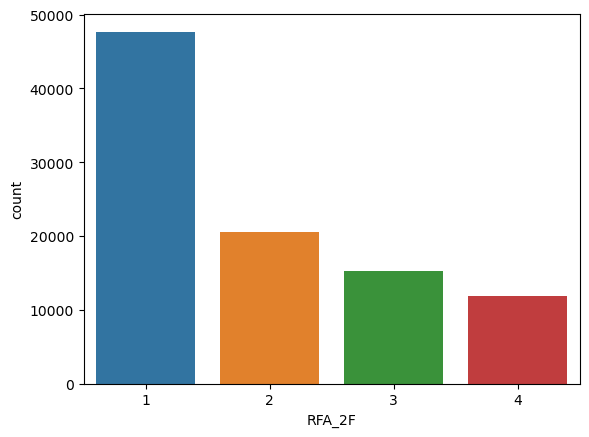

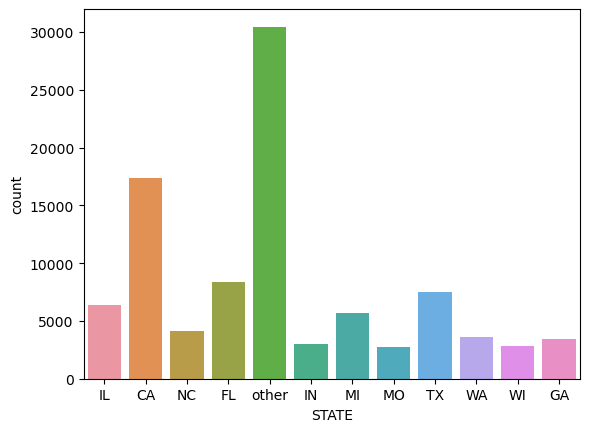

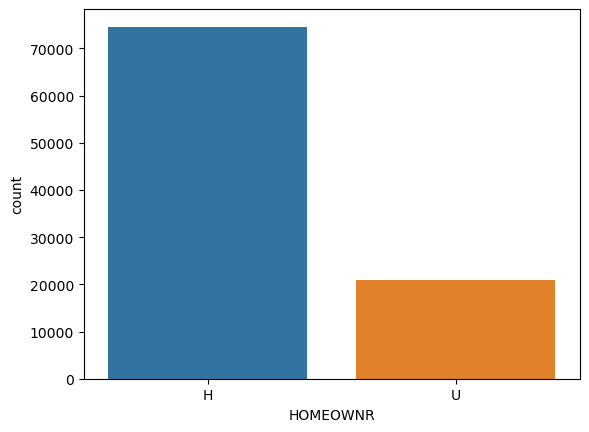

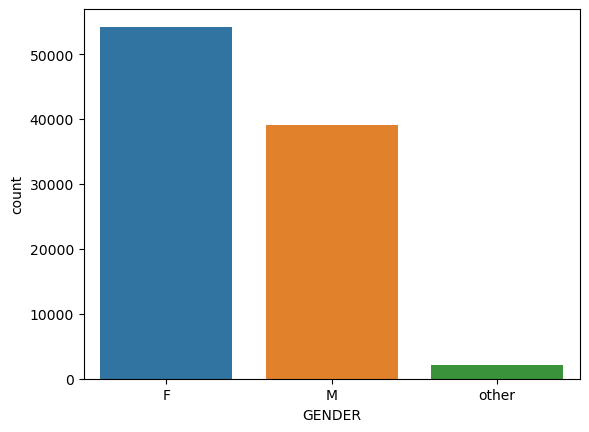

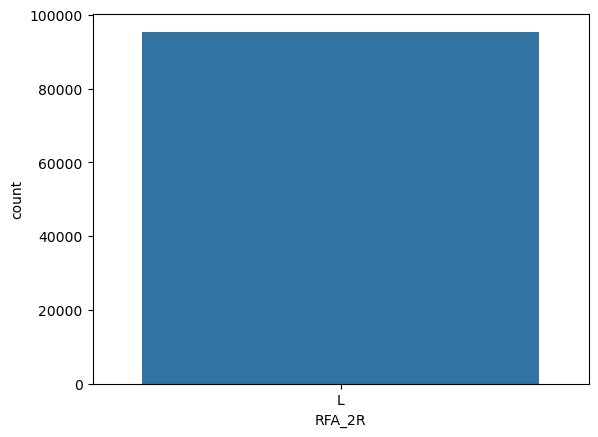

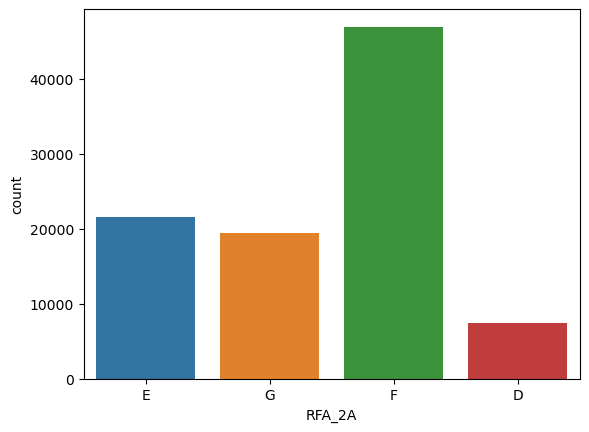

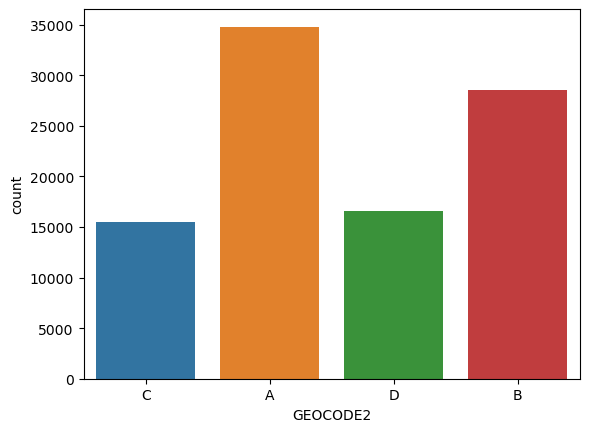

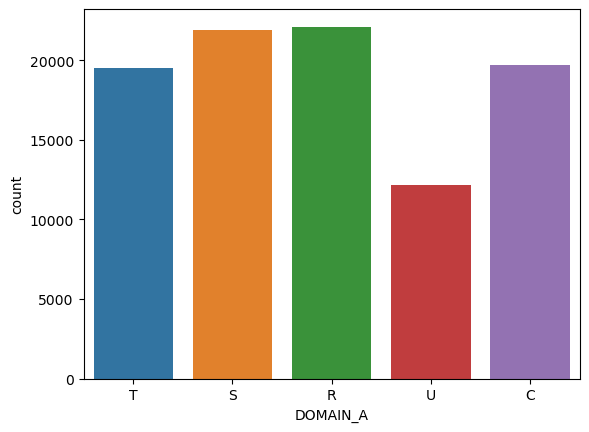

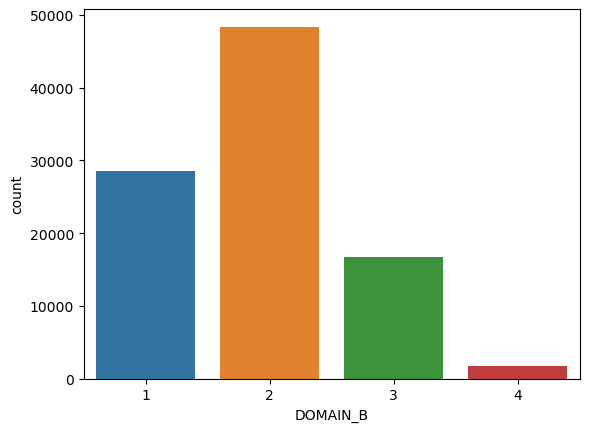

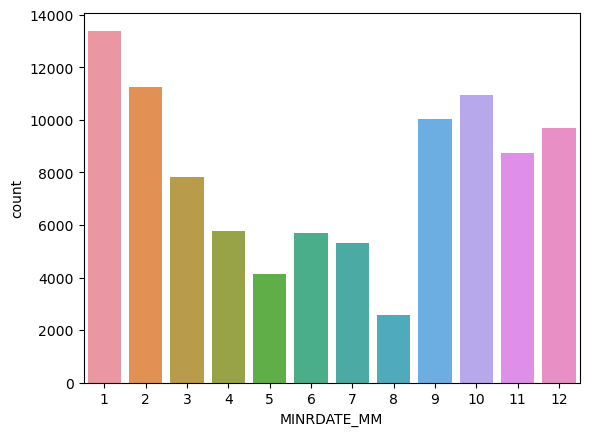

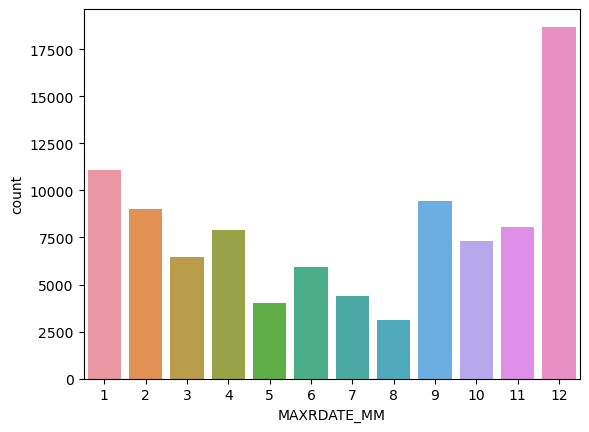

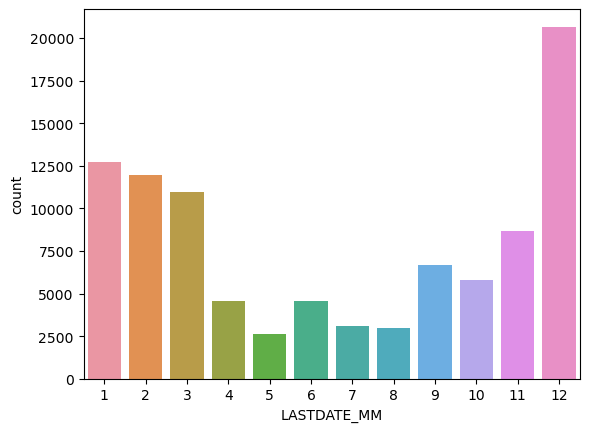

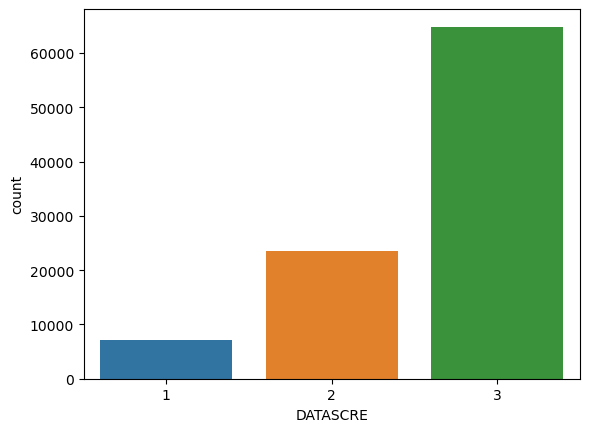

In [87]:
for col in X_cat:
    sns.countplot(x=X_cat[col])
    plt.show()

##### Maybe get rid of:
- WEALTH1 looks like it is the same as WEALTH2, which has more explanation in the explanation tool
- RFA_2R is just one value
- HPHONE_D
- GEOCODE2 - delete because we already have state?
- DROP MINDATE MAXDATE_MM looks very similar
- DATASCRE

In [94]:
X_cat_clean = X_cat[['INCOME', 'WEALTH2','RFA_2F', 'STATE','HOMEOWNR', 'GENDER', 'RFA_2A', 'GEOCODE2','DOMAIN_A', 'DOMAIN_B', 'LASTDATE_MM']]

In [95]:
X_cat_clean

,INCOME,WEALTH2,RFA_2F,STATE,HOMEOWNR,GENDER,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,LASTDATE_MM
0,5,5,4,IL,H,F,E,C,T,2,12
1,6,9,2,CA,H,M,G,A,S,1,12
2,3,1,4,NC,U,M,E,C,R,2,12
3,1,0,4,CA,U,F,E,C,R,2,12
4,3,9,2,FL,H,F,F,A,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...
95407,5,9,1,other,H,M,G,C,C,2,2
95408,7,9,1,TX,H,M,F,A,C,1,3
95409,5,9,3,MI,H,M,E,B,C,3,10
95410,7,7,4,CA,H,F,F,A,C,1,1


#### 3.4 Concatenate the clean variables into features

In [96]:
features = pd.concat((X_num_clean, X_cat_clean), axis = 1)
features.head(3)

,CARDGIFT,NGIFTALL,HV2,NUMPROM,CLUSTER2,HV4,MSA,HC6,POBC2,INCOME,WEALTH2,RFA_2F,STATE,HOMEOWNR,GENDER,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,LASTDATE_MM
0,14,31,635,74,39,2,0.0,31,74,5,5,4,IL,H,F,E,C,T,2,12
1,1,3,5218,32,1,10,4480.0,97,39,6,9,2,CA,H,M,G,A,S,1,12
2,14,27,546,63,60,1,0.0,50,84,3,1,4,NC,U,M,E,C,R,2,12


### 4. Prepare the model

#### 4.1 Train/test Split

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y_B, random_state=0)

#### 4.2. SCALE

##### 4.2.1 MinMaxScaler Numericals

In [98]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,CARDGIFT,NGIFTALL,HV2,NUMPROM,CLUSTER2,HV4,MSA,HC6,POBC2
4398,5,7,518,30,61,2,0.0,48,83
90538,14,21,709,78,37,3,0.0,41,60
16147,1,2,493,20,39,3,0.0,0,85
65008,9,9,1055,69,15,9,4520.0,91,52
52515,16,21,814,73,37,3,0.0,19,60


In [99]:
transformer = MinMaxScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [100]:
pd.DataFrame(numericals_train_standardized).head()

,0,1,2,3,4,5,6,7,8
0,0.121951,0.041096,0.086333,0.136126,0.983607,0.153846,0.000000,0.484848,0.838384
1,0.341463,0.136986,0.118167,0.387435,0.590164,0.230769,0.000000,0.414141,0.606061
2,0.024390,0.006849,0.082167,0.083770,0.622951,0.230769,0.000000,0.000000,0.858586
3,0.219512,0.054795,0.175833,0.340314,0.229508,0.692308,0.482906,0.919192,0.525253
4,0.390244,0.136986,0.135667,0.361257,0.590164,0.230769,0.000000,0.191919,0.606061


##### 4.2.2 ONEHOT ENCODING
- RFA_2F
- STATE
- HOMEOWNR
- GENDER
- GEOCODE
- RFA_2A
- DOMAIN_A
- LASTDATE

In [101]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

onehot_train = categoricals_train.drop(['INCOME', 'WEALTH2', 'DOMAIN_B'], axis = 1)
onehot_test = categoricals_test.drop(['INCOME', 'WEALTH2', 'DOMAIN_B'], axis = 1)
onehot_train.head()

,RFA_2F,STATE,HOMEOWNR,GENDER,RFA_2A,GEOCODE2,DOMAIN_A,LASTDATE_MM
4398,4,TX,H,F,F,D,R,3
90538,1,other,H,F,F,D,T,12
16147,1,WI,H,M,F,C,T,12
65008,1,other,H,F,F,B,T,1
52515,1,WA,H,M,E,C,C,11


In [102]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(onehot_train)
onehot_train_encoded = encoder.transform(onehot_train).toarray()
onehot_test_encoded = encoder.transform(onehot_test).toarray()

##### 4.2.3 ORDINAL ENCODING
- Income
- Wealth2
- DOMAIN_B

In [106]:
ordinal_train = categoricals_train[['INCOME', 'WEALTH2', 'DOMAIN_B']]
ordinal_test = categoricals_test[['INCOME', 'WEALTH2', 'DOMAIN_B']]
ordinal_train.head()

,INCOME,WEALTH2,DOMAIN_B
4398,4,9,2
90538,5,8,2
16147,5,9,2
65008,6,9,1
52515,5,4,2


In [107]:
X_train_processed = np.concatenate((numericals_train_standardized, onehot_train_encoded, ordinal_train), axis = 1)
X_test_processed = np.concatenate((numericals_test_standardized, onehot_test_encoded, ordinal_test), axis = 1)

In [115]:
pd.DataFrame(X_train_processed)

array([[0.12195121951219512, 0.0410958904109589, 0.08633333333333333,
        ..., 4, 9, 2],
       [0.34146341463414637, 0.136986301369863, 0.11816666666666666, ...,
        5, 8, 2],
       [0.024390243902439025, 0.00684931506849315, 0.08216666666666667,
        ..., 5, 9, 2],
       ...,
       [0.2682926829268293, 0.1095890410958904, 0.09766666666666667, ...,
        5, 4, 2],
       [0.29268292682926833, 0.1506849315068493, 0.08449999999999999,
        ..., 5, 3, 2],
       [0.24390243902439024, 0.14383561643835616, 0.14516666666666667,
        ..., 2, 9, 2]], dtype=object)

### 5. Run the model

In [109]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_processed, y_train)
LR.score(X_test_processed, y_test)   # LR score is 0.80, it is good number

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9474279964784303

In [111]:
pred = LR.predict(X_test_processed)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[22599,     0],
       [ 1254,     0]])

In [112]:
print(y_test.value_counts())

0    22599
1     1254
Name: TARGET_B, dtype: int64


Even though the R2 score is high, the results of the confusion_matrix show that we are not able to predict the people who are donating correclty. This is due to imbalance. 

### 6. IMBALANCE
- APPLY THIS ONLY TO THE TRAINSET

In [134]:
X_train_imb = pd.DataFrame(X_train_processed)

In [135]:
trainset = pd.concat((X_train_imb, y_train), axis = 1)
trainset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,TARGET_B
0,0.121951,0.041096,0.086333,0.136126,0.983607,0.153846,0.0,0.484848,0.838384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,2,0.0
1,0.341463,0.136986,0.118167,0.387435,0.590164,0.230769,0.0,0.414141,0.606061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,8,2,0.0
2,0.02439,0.006849,0.082167,0.08377,0.622951,0.230769,0.0,0.0,0.858586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,9,2,0.0
3,0.219512,0.054795,0.175833,0.340314,0.229508,0.692308,0.482906,0.919192,0.525253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,9,1,NaN
4,0.390244,0.136986,0.135667,0.361257,0.590164,0.230769,0.0,0.191919,0.606061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,4,2,0.0


In [136]:
trainset['TARGET_B'].value_counts()

0.0    67970
1.0     3589
Name: TARGET_B, dtype: int64

In [137]:
from sklearn.utils import resample
# Split my data into category 0 and category 1. I do that to tackle imbalance

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

#### 6.1 Downsampling

In [138]:
# Choose enough rows from the category_0 so that they are the same as category 1
category_0_undersampled = resample(category_0, 
                                   replace=False, # If we put True in replace, we could end up with duplicates
                                   n_samples = len(category_1)) #the same number as I have in my category 1

In [139]:
# ALWAYS make sure that it is the same
print(category_0_undersampled.shape)
print(category_1.shape)

(3589, 51)
(3589, 51)


In [140]:
# CREATE A DATAFRAME with the downsampled data
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0) # axis = 0 because we put the two dataframes underneath each oder

In [150]:
data_downsampled.isna().sum()

0           1728
1           1728
2           1728
3           1728
4           1728
5           1728
6           1728
7           1728
8           1728
9           1728
10          1728
11          1728
12          1728
13          1728
14          1728
15          1728
16          1728
17          1728
18          1728
19          1728
20          1728
21          1728
22          1728
23          1728
24          1728
25          1728
26          1728
27          1728
28          1728
29          1728
30          1728
31          1728
32          1728
33          1728
34          1728
35          1728
36          1728
37          1728
38          1728
39          1728
40          1728
41          1728
42          1728
43          1728
44          1728
45          1728
46          1728
47          1728
48          1728
49          1728
TARGET_B       0
dtype: int64

In [151]:
data_downsampled_test = data_downsampled.dropna()

In [152]:
data_downsampled_test['TARGET_B'].value_counts()

0.0    2736
1.0    2714
Name: TARGET_B, dtype: int64

In [155]:
X_train_down_test = data_downsampled_test.drop(['TARGET_B'], axis = 1)
y_train_down_test = data_downsampled_test['TARGET_B']

In [157]:
display(X_train_down_test)
display(pd.DataFrame(y_train_down_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
13354,0.292683,0.143836,0.104667,0.303665,0.688525,0.076923,0.049145,0.626263,0.89899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7,9,1
37745,0.02439,0.0,0.169333,0.052356,0.459016,0.384615,0.17094,0.070707,0.69697,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,9,2
40289,0.219512,0.10274,0.090167,0.439791,0.918033,0.076923,0.0,0.525253,0.656566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,9,3
66810,0.195122,0.082192,0.0795,0.329843,0.967213,0.153846,0.482906,0.424242,0.676768,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,2
70070,0.121951,0.041096,0.328167,0.136126,0.508197,0.461538,0.760684,0.69697,0.585859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71460,0.097561,0.041096,0.0545,0.183246,0.967213,0.076923,0.0,0.373737,0.848485,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,9,2
71466,0.097561,0.054795,0.167167,0.455497,0.655738,0.153846,0.294872,0.626263,0.757576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,8,1
71473,0.097561,0.027397,0.091667,0.17801,0.803279,0.230769,0.320513,0.090909,0.838384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,9,3
71517,0.04878,0.020548,0.038333,0.141361,0.47541,0.230769,0.230769,0.0,0.747475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,4


,TARGET_B
13354,0.0
37745,0.0
40289,0.0
66810,0.0
70070,0.0
...,...
71460,1.0
71466,1.0
71473,1.0
71517,1.0


#### 6.2 Upsampling

In [142]:
category_1_oversampled = resample(category_1, #end up with duplicates
                                  replace=True, # Needs to be true because we don't have enough samples
                                  n_samples = len(category_0)) #

In [143]:
print(category_0.shape)
print(category_1_oversampled.shape)

(67970, 51)
(67970, 51)


In [144]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [147]:
data_upsampled['TARGET_B'].value_counts()

0.0    67970
1.0    67970
Name: TARGET_B, dtype: int64

In [148]:
X_train_up = data_upsampled.drop(['TARGET_B'], axis = 1)
y_train_up = data_upsampled['TARGET_B']

##### 6.1.2 Check model

In [130]:
pd.DataFrame(X_train_down)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
2502,0.195122,0.116438,0.5085,0.340314,0.131148,0.461538,0.790598,0.292929,0.505051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7,1
72995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19903,0.121951,0.061644,0.1545,0.308901,0.295082,0.307692,0.542735,0.212121,0.828283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,9,2
10674,0.097561,0.041096,0.1965,0.256545,0.065574,0.307692,0.440171,0.949495,0.282828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,2
36524,0.073171,0.020548,0.1155,0.162304,0.278689,0.461538,0.299145,1.0,0.414141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_down_test, y_train_down_test)
LR.score(X_test_processed, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5190122835702008

In [159]:
pred = LR.predict(X_test_processed)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[11771, 10828],
       [  645,   609]])